## 이세상에는 정말 다양한 프레임워크가 존재함
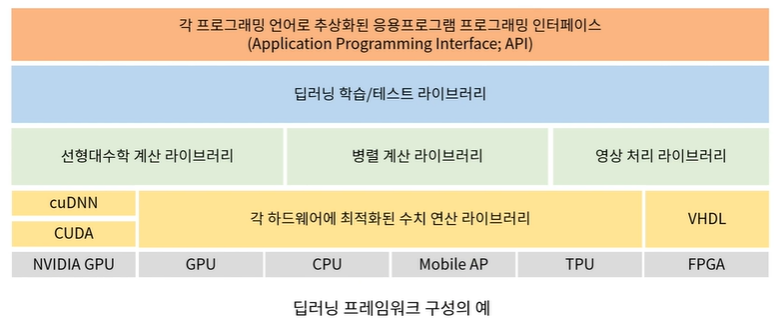

- 다양한 하드웨어 구성 안에서 하위/상위로 올라가는 프레임워크가 존재
  - 엔비디아에 최적화된 CUDA 외에도 여러 하드웨어 별 프레임워크가 존재함
- 기본적으로 C++ 으로 작성된 딥러닝 학습/테스트 라이브러리 위에 python을 이용한 프로그래밍이 가능 

### 딥러닝 프레임워크의 장점과 단점
#### 장점
- API의 사용법만 알면 딥러닝 알고리즘을 쉽고 빠르게 구현 가능
- 최적화를 신경 쓰지 않아도 프레임워크가 내부적으로 최적화됨
- 구동되는 Device에 종속되지 않은 코드를 작성할 수 있음
- 수치 연산 상의 문제(ex : 0으로 나누기)로부터 안전한 구현을 할 수 있음

#### 단점
- API에서 제공하지 않는 기능은 구현하기 어려움
- 프레임워크가 제공하는 수준 이상의 최적화가 어려움
- API 버전에 따라 동일한 코드의 동작이 다를 수 있음
- API에 버그가 있음 경우 대응이 어려움

## 딥러닝 프레임워크 소개
### 1. TensorFlow
- 가장 인기있는 딥러닝 프레임워크
- 저수준 라이브러리로 유연성이 뛰어남(1.0 기준)
- 구글에서 개발, 오픈소스로 공개
- Python, JavaScript, C++, Java, Go, Swift 등 API 지원
- 최근 Keras를 정식 API에 포함시켜 사용성 증대

### 2. torch(Pytorch)
- Lua 기반의 딥러닝 프레임워크
- 페이스북, 트위터 등에서 주로 연구에 사용
- 유연성과 모델 제작의 단순함을 추구함
- Python 구현인 Pytorch가 상당한 인기를 끌고 있음

### 3. Keras
- 단순한 API를 이용하여 고수준의 딥러닝 작업을 할 수 있는 라이브러리
- Theano와 TensorFlow를 백엔드로 사용
- Python API만을 지원하여, 비교적 확장성은 부족
- 최근에는 TensorFlow API에 정식으로 포함되었음

### 4. Caffe
- 버클리 대학에서 개발한 딥러닝 라이브러리
- 자체적인 스크립트 언어로 딥러닝 모델을 구현
- C++ 라이브러리, Python API도 제공
- 초창기에 많이 사용되었던 API 중 하나

### 5. theano
- 최초의 딥러닝 라이브러리 중 하나
- 저수준 라이브러리로 딥러닝 모델을 직접 구현하는데 유리
- 확장성은 떨어지는 편이며 다중 GPU 지원이 부족함
- 초창기 Keras의 백엔드로 사용됨

### 6. MatConvNet
- MATLAB 기반의 딥러닝 프레임워크
- MATLAB에서 GPU를 사용한 CNN 구현으로 인기를 끌었음
- MATLAB 자체 딥러닝 라이브러리를 제공하면서 개발이 중단됨

In [1]:
# import module
import tensorflow as tf

In [2]:
print(tf.__version__)

2.6.0


## Tensorflow 2.0의 이해
### Tensorflow
- 구글에서 꾸준히 개발/배포하는 오픈 소스 프레임워크
- 2.0 알파 버전이 미리 공개되어 개발자들이 테스트해볼 수 있음
- 학계는 물론, 산업계에서도 가장 많이 사랑받는 프레임워크

### Tensorflow 1.0
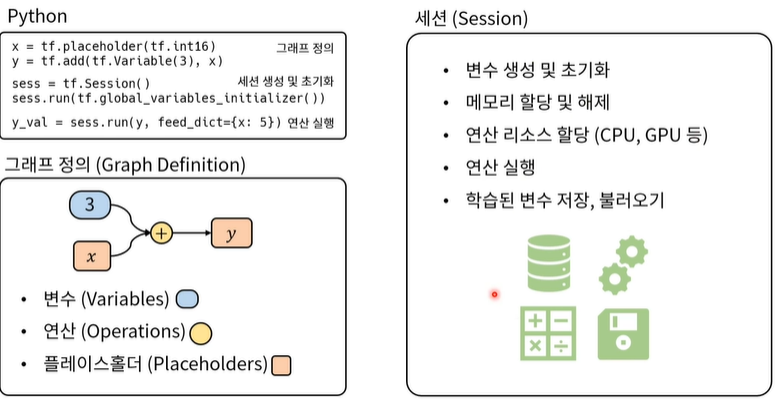

- Tensorflow 2.0에서는 그래프 정의와 세션이 과감히 삭제됨
- AutoGraph의 Eager execution으로 간단하게 구현
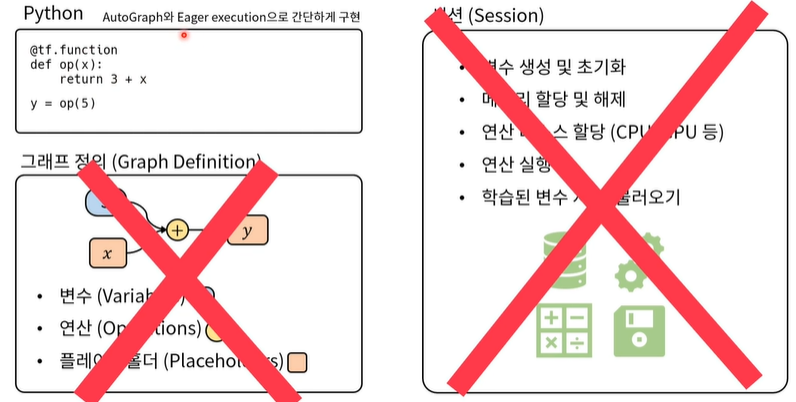

### Tensorflow 2.x의 장점
- Eager execution으로 곧바로 실행되는 코드 구현(파이토치의 직관성)
- AutoGraph를 통한 자동 코드 변환 기능으로 기존 세션 방식의 장점을 유지함
- 1.x버전에서 여러 구현이 혼재하던 API를 Keras를 주축으로 깔끔하게 정리
- Keras 방식의 간단한 구현과 Tensorflow 방식의 유연한 구현을 모두 사용 가능
- Dataset 및 Log 관리의 편의성 향상
- 사용자 수준에 따라 직관성, 편리성, 유연성을 조절하여 자유롭게 사용 가능
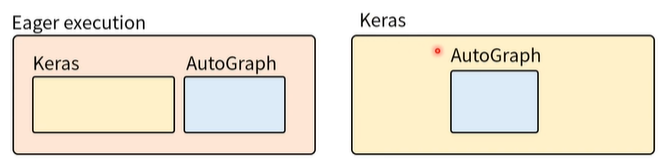
- 어떤 형태로든 사용자가 편한대로 유연하게 구성할 수 있다.

## Tensorflow 2.x의 이해

In [23]:
# import module
import tensorflow as tf
# 데이터 불러오기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 #정규화

In [24]:
#네트워크 구조 정의
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')])
# Dense를 두 번 정의하고 dropout을 정의하는 과정 포함

In [25]:
#Keras 모델 compile
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
#학습 수행
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2928 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1451 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1072 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0893 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0759 - accuracy: 0.9759


In [27]:
#학습 결과 테스트
model.evaluate(x_test, y_test)#97퍼센트의 적중률

313/313 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9753


[0.07664060592651367, 0.9753000140190125]